In [2]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm # for printing progress bars

# The concept of criticality

## Ex 1.
Using IsingModel class (from `workshops` package) simulate the Ising model for several values of Temperature on a 20x25 lattice. You have to create the lattice for the model using `Grid` class's method `grid_2d`.
The temperatures for simulations should in interval [0.1, 4.0]. You have to specify the number of time steps (1000 or 2000 should be enough), and create a simple loop to get results to aggregate the results for all the temperatures.

Tip: IsingModel class has a simple method for simulation: simulate()

The magnetization at time *t* can be calculated as a average of all spins of the lattice:
$$M = \frac{1}{N}\sum_i \sigma_i $$
Then, average the magnetization over time and plot the averages versus temperature. You should get something looking like this:
![image](plots/ising_magnetization.png)

Tip: In case you are running out of time to run the simulation (it takes around 3 min on a laptop/colab), you can use provided simulation data `example_data/ising_dynamics.npz`.

In [158]:
from workshops import IsingModel
from workshops import Grid

In [159]:
n_steps = 2000
Lx, Ly = 20, 25
net_size = Lx * Ly
network = Grid.grid_2d(Lx, Ly)

Ts = np.arange(0.1, 4.15, 0.25)
ising_dynamics = []
for T in Ts:
    print("{:.2f}".format(T))
    model = IsingModel(n_steps=n_steps,
                       T=T,
                       network=network,
                       )
    ising_dynamics.append(model.simulate())
ising_dynamics = np.array(ising_dynamics)

0.10


KeyboardInterrupt: 

In [161]:
np.savez_compressed('example_data/ising_dynamics.npz',Ts = Ts, ising_dynamics = ising_dynamics)

In [160]:
f = np.load('example_data/ising_dynamics.npz')
ising_dynamics = f['ising_dynamics']

Text(0, 0.5, 'Abs. average magnetization')

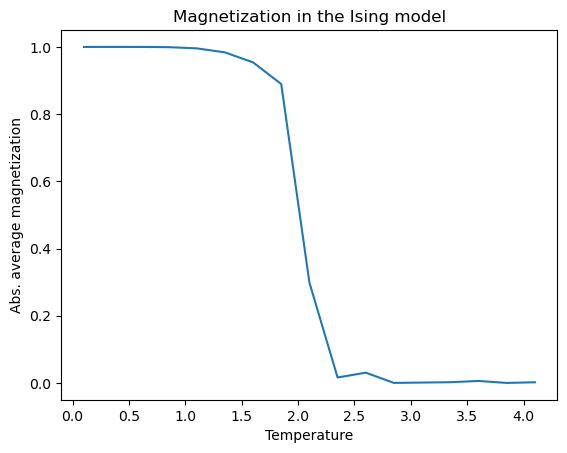

In [163]:
abs_magnetization = np.abs(ising_dynamics.sum(axis=1).mean(axis=1) / net_size)
plt.plot(Ts, abs_magnetization,)
plt.title('Magnetization in the Ising model')
plt.xlabel("Temperature")
plt.ylabel("Abs. average magnetization")
# plt.savefig("plots/ising_magnetization.png")

## Ex. 2
To see in more detail what is happening plot two or three states of the lattice ("snapshots") for small temperature around 0.5, for large temperature c.a. 4.0, and for Temperature near the transition, e.g. T=2.3.

The results should look similarly to these:
![image](plots/ising_snap1.png)
![image](plots/ising_snap2.png)
![image](plots/ising_snap3.png)


In [7]:
print(Ts[[2, 9, 14]])
snapshots = ising_dynamics.reshape(len(Ts), Lx, Ly, n_steps)
t1, t2, t3 = 500, 1000, 1500  # times of snapshots

[0.6  2.35 3.6 ]


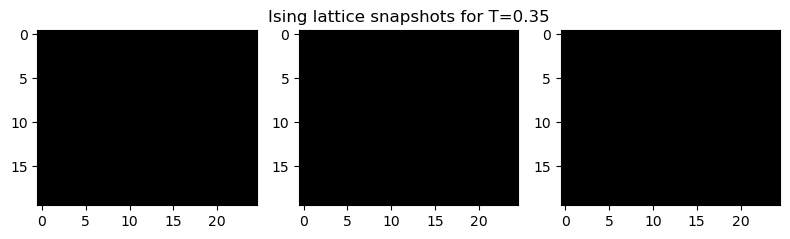

In [8]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(8,3))
nt = 1
ax1.imshow(snapshots[nt, :, : , t1], cmap='gray')
ax2.imshow(snapshots[nt, :, : , t2], cmap='gray')
ax3.imshow(snapshots[nt, :, : , t3], cmap='gray')

ax2.set_title("Ising lattice snapshots for T={:.2f}".format(Ts[nt]))
fig.tight_layout()

# fig.savefig("plots/ising_snap1.png")

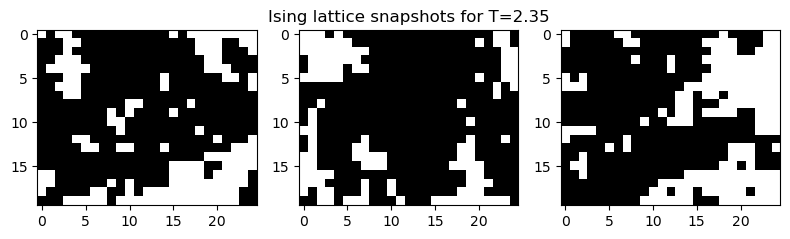

In [9]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(8,3))
nt = 9
ax1.imshow(snapshots[nt, :, : , t1], cmap='gray')
ax2.imshow(snapshots[nt, :, : , t2], cmap='gray')
ax3.imshow(snapshots[nt, :, : , t3], cmap='gray')

ax2.set_title("Ising lattice snapshots for T={:.2f}".format(Ts[nt]))
fig.tight_layout()
# fig.savefig("plots/ising_snap2.png")

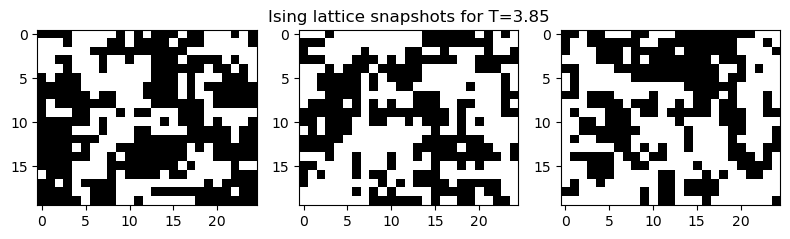

In [10]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(8,3))
nt = 15
ax1.imshow(snapshots[nt, :, : , t1], cmap='gray')
ax2.imshow(snapshots[nt, :, : , t2], cmap='gray')
ax3.imshow(snapshots[nt, :, : , t3], cmap='gray')

ax2.set_title("Ising lattice snapshots for T={:.2f}".format(Ts[nt]))
fig.tight_layout()

# fig.savefig("plots/ising_snap3.png")

## (*) Ex. 3
Consider a binomial model which is a set of independent spins each drawn from a specially crafted binomial distribution. Plot the magnetization in this case. Do you see any differences? What happened here, is critical behavior present? To ensure what happens plot again the snapshots and describe any differences between Binomial / Ising models.

In [18]:
class BinomialModel(IsingModel):
    
    def __init__(self,*args,**kwargs):
        super().__init__(*args,**kwargs)
        
    def sweep(self,s: dict) -> None:
        if self.n_sweep:
            f = lambda x: random.sample(x,self.n_sweep)
        else:
            f = lambda x: x
            
        p = 1/2*(self.calc_mag(T = self.T,J = self.J)+1)
        
        for n in s.keys():
            s[n] = -(2*np.random.binomial(n=1,p=p)-1)
        

In [19]:
n_steps = 2000
Lx, Ly = 20, 25
net_size = Lx * Ly
network = Grid.grid_2d(Lx, Ly)

In [150]:
Ts = np.arange(0.1, 4.15, 0.05)

In [20]:
Ts = np.arange(0.1, 4.15, 0.05)
binomial_dynamics = []
for T in Ts:
    print("{:.2f}".format(T))
    model = BinomialModel(n_steps=n_steps,
                          T=T,
                          network=network,
                         )
    binomial_dynamics.append(model.simulate())
binomial_dynamics = np.array(binomial_dynamics)

0.10
0.15
0.20
0.25
0.30
0.35
0.40
0.45
0.50
0.55
0.60
0.65
0.70
0.75
0.80
0.85
0.90
0.95
1.00
1.05
1.10
1.15
1.20
1.25
1.30
1.35
1.40
1.45
1.50
1.55
1.60
1.65
1.70
1.75
1.80
1.85
1.90
1.95
2.00
2.05
2.10
2.15
2.20
2.25
2.30
2.35
2.40
2.45
2.50
2.55
2.60
2.65
2.70
2.75
2.80
2.85
2.90
2.95
3.00
3.05
3.10
3.15
3.20
3.25
3.30
3.35
3.40
3.45
3.50
3.55
3.60
3.65
3.70
3.75
3.80
3.85
3.90
3.95
4.00
4.05
4.10
4.15


In [152]:
np.savez_compressed('example_data/binomial_dynamics.npz',Ts = Ts, binomial_dynamics = binomial_dynamics)

In [153]:
f = np.load('example_data/binomial_dynamics.npz')
binomial_dynamics = f['binomial_dynamics']
Ts = f['Ts']

Text(0, 0.5, 'Abs. average magnetization')

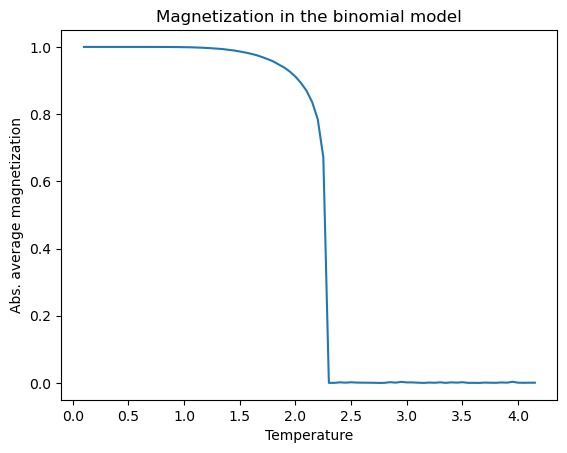

In [157]:
data = binomial_dynamics
abs_magnetization = np.abs(data.sum(axis=1).mean(axis=1) / net_size)
plt.plot(Ts, abs_magnetization,)
# plt.plot(Ts[43],abs_magnetization[43],'.')
plt.title('Magnetization in the binomial model')
plt.xlabel("Temperature")
plt.ylabel("Abs. average magnetization")
# plt.savefig("plots/ising_magnetization.png")

In [46]:
print(Ts[[10, 44, 60]])
snapshots = data.reshape(len(Ts), Lx, Ly, n_steps)
t1, t2, t3 = 500, 1000, 1500  # times of snapshots

[0.6 2.3 3.1]


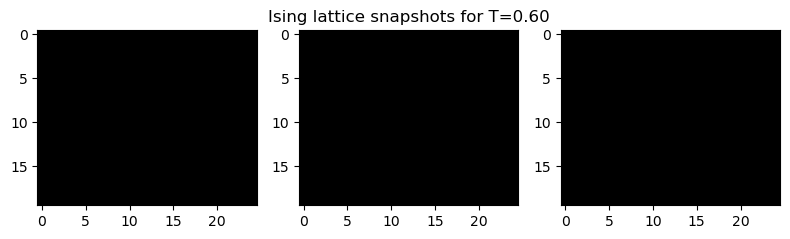

In [47]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(8,3))
nt = 10
ax1.imshow(snapshots[nt, :, : , t1], cmap='gray')
ax2.imshow(snapshots[nt, :, : , t2], cmap='gray')
ax3.imshow(snapshots[nt, :, : , t3], cmap='gray')

ax2.set_title("Ising lattice snapshots for T={:.2f}".format(Ts[nt]))
fig.tight_layout()

# fig.savefig("plots/ising_snap1.png")

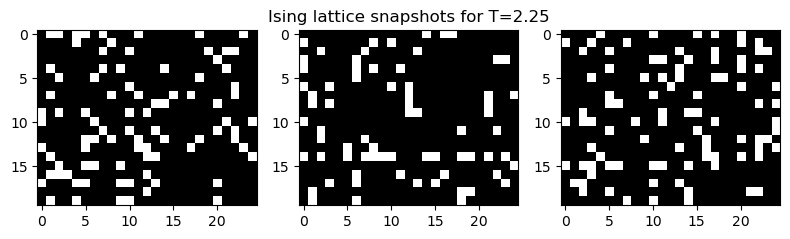

In [48]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(8,3))
nt = 43
ax1.imshow(snapshots[nt, :, : , t1], cmap='gray')
ax2.imshow(snapshots[nt, :, : , t2], cmap='gray')
ax3.imshow(snapshots[nt, :, : , t3], cmap='gray')

ax2.set_title("Ising lattice snapshots for T={:.2f}".format(Ts[nt]))
fig.tight_layout()
# fig.savefig("plots/ising_snap2.png")

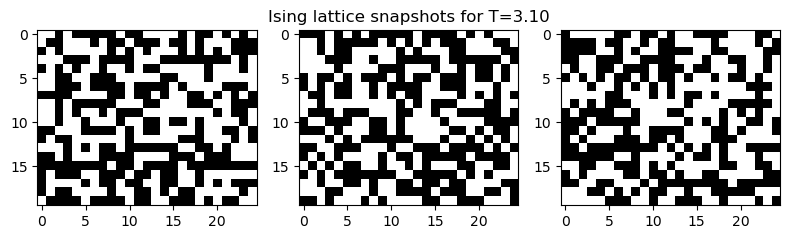

In [49]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(8,3))
nt = 60
ax1.imshow(snapshots[nt, :, : , t1], cmap='gray')
ax2.imshow(snapshots[nt, :, : , t2], cmap='gray')
ax3.imshow(snapshots[nt, :, : , t3], cmap='gray')

ax2.set_title("Ising lattice snapshots for T={:.2f}".format(Ts[nt]))
fig.tight_layout()

# fig.savefig("plots/ising_snap3.png")

# Towards a brain model



## Ex. 1

Consider the Haimovici model. First load a human connectome (adjacency matrix) and *spy* on it to see how the connections are distributed (using `spy` function from `matplotlib.pyplot`).
Then, run Haimovici model simulation for `n_steps=2000` time steps (or more if you wish!).

Remember that the output matrix nodes that can have 3 states:
* active (excited) nodes are represented by 1,
* refractory nodes are represented by -1,
* inactive (susceptible) nodes are represented by 0.

['connectome', 'roi_lbs']


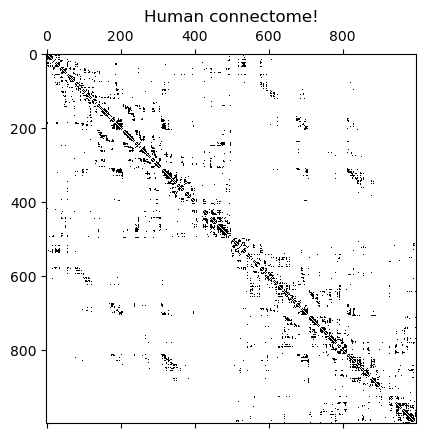

In [53]:
human_connectome_file = np.load("hagmann_connectome.npz")
print(human_connectome_file.files)
human_connectome = human_connectome_file["connectome"]
# print(human_connectome.shape)
plt.spy(human_connectome)
plt.title("Human connectome!");

In [50]:
from workshops import SERModel

In [51]:
# simple function to run the Haimovici model for a given connectome matrix and set of threshold values

def run_haimovici_simulation(n_steps, connectome, ts_vals):
    output = []

    for T in tqdm(ts_vals):
        model = SERModel(n_steps=n_steps,
                        connectome=connectome,
                        threshold=T)
        output.append(model.simulate())
    output = np.array(output)
    return output


In [54]:
n_steps = 2000
Ts = np.arange(0.01, 0.2, 0.01)
dynamics = run_haimovici_simulation(n_steps, human_connectome, Ts)


100%|███████████████████████████████████████████| 19/19 [00:11<00:00,  1.60it/s]


After you simulate the brain activity using the Haimovici model, plot the average fractions of active, refractory and inactive vs. threshold values. You should see something time this:


In [61]:
N_tot = human_connectome.shape[0]
active = (dynamics==1).astype(int).sum(axis=1).mean(axis=1) / N_tot
refractory = (dynamics==-1).astype(int).sum(axis=1).mean(axis=1) / N_tot
inactive = (dynamics==0).astype(int).sum(axis=1).mean(axis=1) / N_tot

# plt.plot(Ts, active)
# plt.plot(Ts, refractory)
# plt.plot(Ts, inactive)

Text(0, 0.5, 'Node fraction')

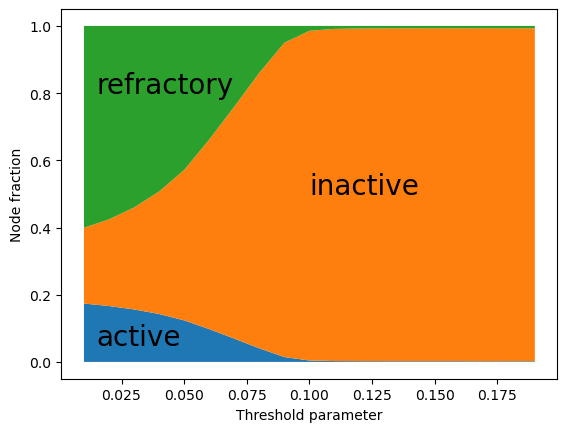

In [63]:
plt.fill_between(Ts, active)
plt.fill_between(Ts, active, active + inactive)
plt.fill_between(Ts, active + inactive, active + refractory + inactive)

plt.text(0.015, 0.05, "active", fontsize=20)
plt.text(0.015, 0.8, "refractory", fontsize=20)
plt.text(0.1, 0.5, "inactive", fontsize=20)
plt.xlabel("Threshold parameter")
plt.ylabel("Node fraction")

## Ex. 2

How is the threshold parameter different from temperature in the Ising model?

Tip: Compare the dynamics in sub-, critical- and super-critical regimes

Tip: Plot sizes of sub-populations in the Ising model

In [83]:
n_steps = 2000
Lx, Ly = 20, 25
net_size = Lx * Ly
network = Grid.grid_2d(Lx, Ly)

In [86]:
Ts0 = np.arange(0.1, 4.15, 0.25)

In [84]:
N_tot = human_connectome.shape[0]
active = (ising_dynamics==1).astype(int).sum(axis=1).mean(axis=1) / N_tot
inactive = (ising_dynamics==-1).astype(int).sum(axis=1).mean(axis=1) / N_tot

# plt.plot(Ts, active)
# plt.plot(Ts, refractory)
# plt.plot(Ts, inactive)

Text(0, 0.5, 'Node fraction')

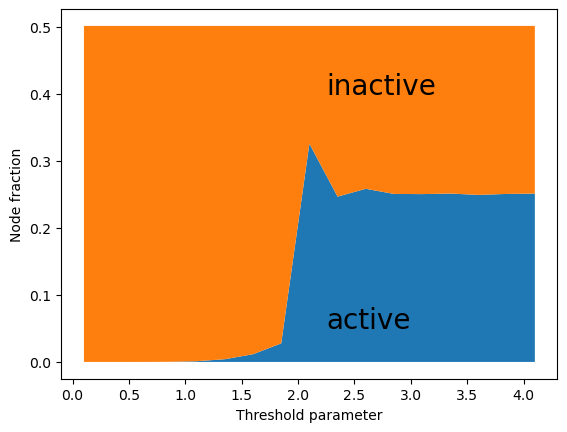

In [96]:
plt.fill_between(Ts0, active)
plt.fill_between(Ts0, active, active + inactive)

plt.text(2.25, 0.05, "active", fontsize=20)
plt.text(2.25, 0.4, "inactive", fontsize=20)
plt.xlabel("Threshold parameter")
plt.ylabel("Node fraction")

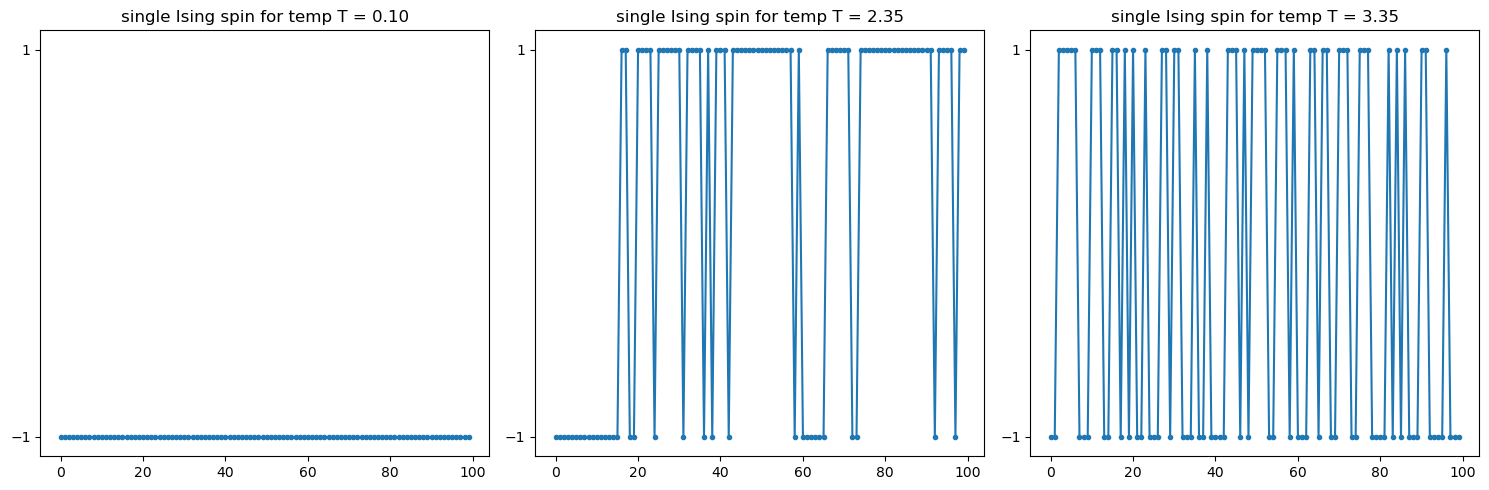

In [146]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))

eps=1e-1
i = 0
ax = ax1
_ = ax.plot(ising_dynamics[i,123,:100],'.-')
_ = ax.set_title(f'single Ising spin for temp T = {Ts0[i]:.2f}')
ax.set_ylim(-1-eps,1+eps)
ax.set_yticks([-1,1])

i = 9
ax = ax2
_ = ax.plot(ising_dynamics[i,123,:100],'.-')
_ = ax.set_title(f'single Ising spin for temp T = {Ts0[i]:.2f}')
ax.set_ylim(-1-eps,1+eps)
ax.set_yticks([-1,1])

i = 13
ax = ax3
_ = ax.plot(ising_dynamics[i,123,:100],'.-')
_ = ax.set_title(f'single Ising spin for temp T = {Ts0[i]:.2f}')
ax.set_ylim(-1-eps,1+eps)
ax.set_yticks([-1,1])

plt.tight_layout()

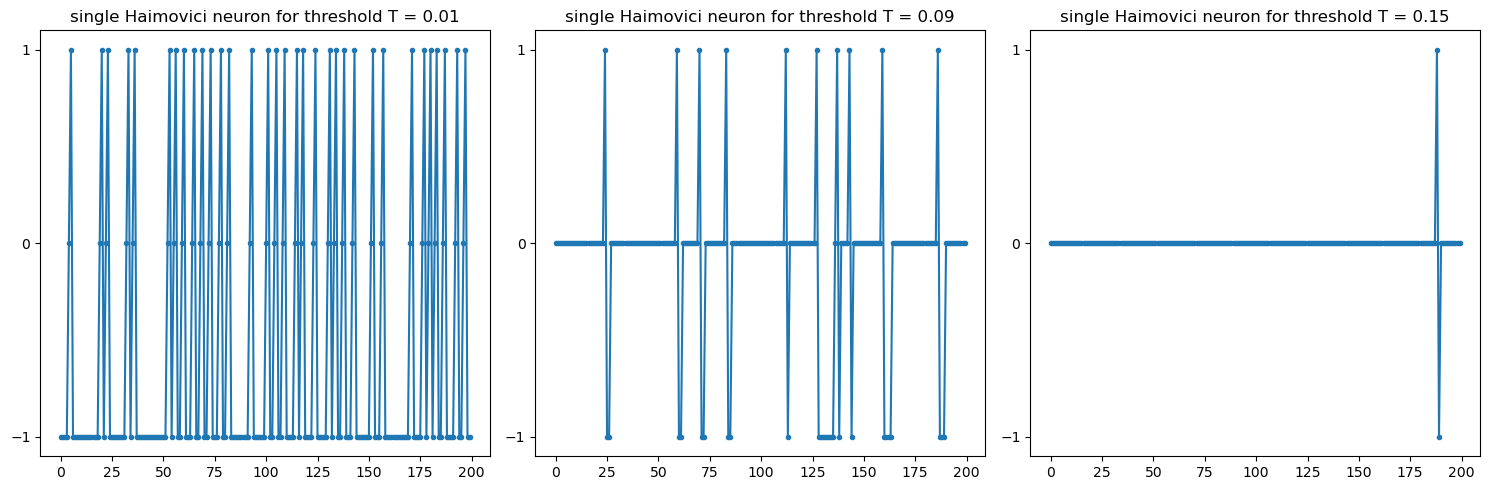

In [143]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))

eps=1e-1
i = 0
ax = ax1
_ = ax.plot(dynamics[i,123,:200],'.-')
_ = ax.set_title(f'single Haimovici neuron for threshold T = {Ts[i]:.2f}')
ax.set_ylim(-1-eps,1+eps)
ax.set_yticks([-1,0,1])

i = 8
ax = ax2
_ = ax.plot(dynamics[i,123,:200],'.-')
_ = ax.set_title(f'single Haimovici neuron for threshold T = {Ts[i]:.2f}')
ax.set_ylim(-1-eps,1+eps)
ax.set_yticks([-1,0,1])

i = 14
ax = ax3
_ = ax.plot(dynamics[i,123,:200],'.-')
_ = ax.set_title(f'single Haimovici neuron for threshold T = {Ts[i]:.2f}')
ax.set_ylim(-1-eps,1+eps)
ax.set_yticks([-1,0,1])


plt.tight_layout()

## Ex. 3

What about artificial connectomes? Try Watts-Strogatz: create a function creates an artificial connectome based on Watts-Strogatz graph but with weights of connections from a real human connectome. The distribution of connections is approximately an exponential distribution with scale factor of $1/12.5$.

The Watts-Strogatz graphs can be easily created using `watts_strogatz_graph` from `networkx` library.
Create two *Watts-Strogatz connectomes* with 2000 nodes; one with mean number of neighbours 10, second with 2. The *rewiring* factor should be around 0.5.

Try plotting the fractions of active/refractory/inactive nodes creating a plot similar to one above.



In [17]:
import networkx as nx

def watts_strogatz_connectome(number_of_nodes, k, pi):
    g = nx.watts_strogatz_graph(number_of_nodes, k, pi)
    adjacency = nx.adjacency_matrix(g).todense().astype(float)
    adj_tri_up = np.triu(adjacency)
    number_of_weights = int(np.sum(adj_tri_up))
    weights = np.random.exponential(scale=1 / 12.5, size=number_of_weights)
    adj_tri_up[adj_tri_up > 0] = weights
    adjacency = adj_tri_up + adj_tri_up.T
    return adjacency


n_nodes = 2000
g1 = watts_strogatz_connectome(n_nodes, 10, 0.2)
g2 = watts_strogatz_connectome(n_nodes, 2, 0.2)
n_steps = 2000

Ts_ws = np.arange(0.01, 0.3, 0.015)
dynamics1 = run_haimovici_simulation(n_steps, g1, Ts_ws)
dynamics2 = run_haimovici_simulation(n_steps, g2, Ts_ws)

/var/folders/dz/g_6b_1qs1zn9zntys_08nsg80000gn/T/ipykernel_27691/3670084589.py:5: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adjacency = nx.adjacency_matrix(g).todense().astype(float)
100%|██████████| 20/20 [00:33<00:00,  1.69s/it]


In [18]:
active1 = (dynamics1==1).astype(int).sum(axis=1).mean(axis=1) / n_nodes
refractory1 = (dynamics1==0).astype(int).sum(axis=1).mean(axis=1) / n_nodes
inactive1 = (dynamics1==-1).astype(int).sum(axis=1).mean(axis=1) / n_nodes

active2 = (dynamics2==1).astype(int).sum(axis=1).mean(axis=1) / n_nodes
refractory2 = (dynamics2==0).astype(int).sum(axis=1).mean(axis=1) / n_nodes
inactive2 = (dynamics2==-1).astype(int).sum(axis=1).mean(axis=1) / n_nodes

In [19]:
# plt.plot(Ts_ws, active1)
# plt.plot(Ts_ws, refractory1)
# plt.plot(Ts_ws, inactive1)

# plt.plot(Ts, (dynamics1==1).astype(int).sum(axis=1).std(axis=1))
# plt.plot(Ts, (dynamics2==1).astype(int).sum(axis=1).std(axis=1))

In [20]:
# plt.plot(Ts_ws, active2)
# plt.plot(Ts_ws, refractory2)
# plt.plot(Ts_ws, inactive2)

Text(0.5, 1.0, 'WS non-critical')

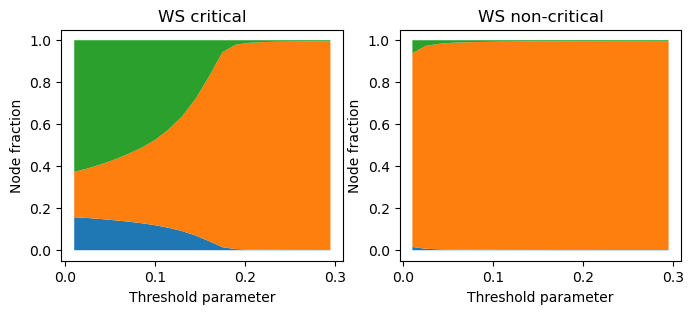

In [21]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))

ax1.fill_between(Ts_ws, active1)
ax1.fill_between(Ts_ws, active1, active1 + refractory1)
ax1.fill_between(Ts_ws, active1 + refractory1, active1 + refractory1 + inactive1)

ax1.set_xlabel("Threshold parameter")
ax1.set_ylabel("Node fraction")

ax1.set_title("WS critical")


ax2.fill_between(Ts_ws, active2)
ax2.fill_between(Ts_ws, active2, active2 + refractory2)
ax2.fill_between(Ts_ws, active2 + refractory2, active2 + refractory2 + inactive2)

ax2.set_xlabel("Threshold parameter")
ax2.set_ylabel("Node fraction")
ax2.set_title("WS non-critical")

# Criticality in the Haimovici model



## Ex. 1.
Using `networkx` library write a function that computes the size of the largest and second-largest clusters in a system. The cluster is defined as a set of active nodes which are connected via the connectome.

Tip: use `networkx`'s function `connected_components` which finds all connected components of a graph.

## Ex. 2.
Take the Ising model for low temperature, e.g. $T=1.5$ (remember about the magnetization plot from the first exercise), and plot the snapshots of the lattice spins. What are the sizes of the largest cluster and second largest clusters?

What about $T = T_c$?


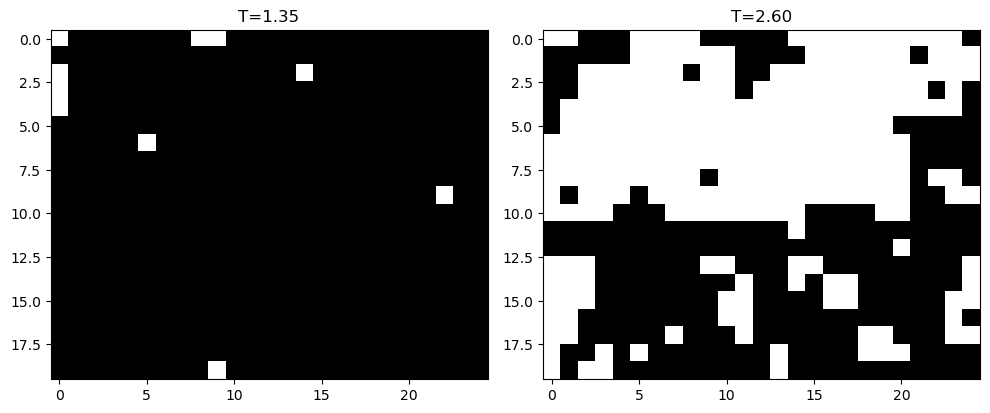

In [22]:
# Ts_ising = np.arange(0.1, 4.15, 0.25)
n_low = 5
n_crit = 10
time = 1500
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.imshow(snapshots[n_low][:,:, time], cmap='gray')
ax1.set_title("T={:.2f}".format(Ts_ising[n_low]))

ax2.imshow(snapshots[n_crit][:,:, time], cmap='gray')
ax2.set_title("T={:.2f}".format(Ts_ising[n_crit]))
fig.tight_layout()

## Ex. 3.

Find the cluster sizes in the Haimovici model. Try plotting the average size of the largest cluster vs. threshold. What is the difference between the largest cluster and the second largest cluster?

In [23]:
from workshops import batch_clusters

clusters = batch_clusters(dynamics, human_connectome)

100%|██████████| 19/19 [00:15<00:00,  1.21it/s]


In [24]:
mean_clusters = clusters.mean(axis=1).T

Text(0.5, 1.0, 'Second largest cluster')

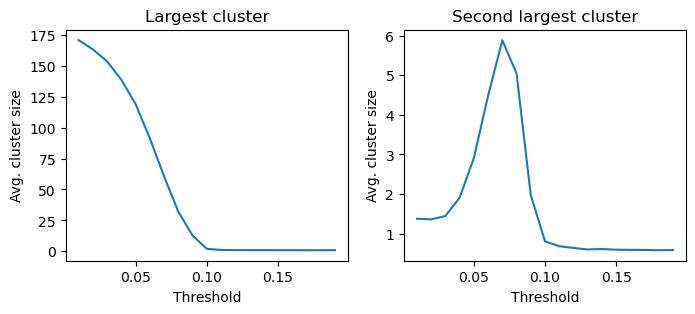

In [25]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,3))

ax1.plot(Ts, mean_clusters[0])
ax1.set_xlabel("Threshold")
ax1.set_ylabel("Avg. cluster size")
ax1.set_title("Largest cluster")

ax2.plot(Ts, mean_clusters[1])
ax2.set_xlabel("Threshold")
ax2.set_ylabel("Avg. cluster size")
ax2.set_title("Second largest cluster")

## Ex. 4.
Find the standard deviation of the total activity. Next prepare a function which computes the autocorrelation coefficient at lat $\tau=1$. Do these quantities have something in common? What about the clusters?

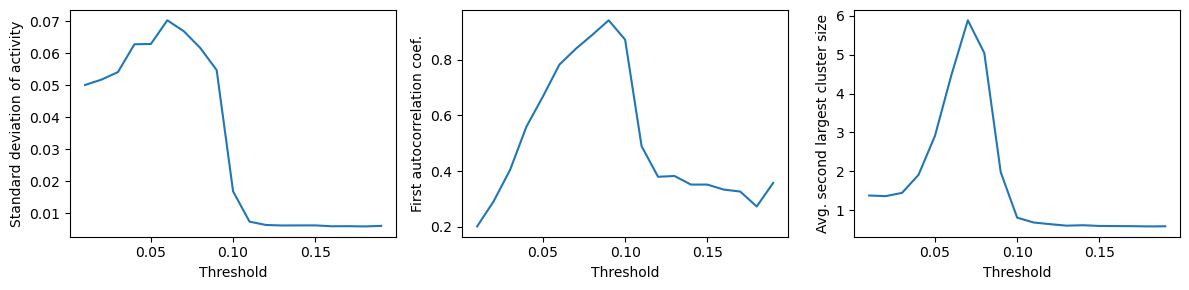

In [26]:
def ac_first_coef(series):
    series -= np.mean(series)
    series /= np.std(series)
    return np.corrcoef(series, np.roll(series, 1))[0,1]

activity_ac1 = np.array([ac_first_coef(series) for series in dynamics.sum(axis=1)/net_size])
std_activity = dynamics.sum(axis=1).std(axis=1) / net_size

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 3))

ax1.plot(Ts, std_activity,)
ax1.set_xlabel("Threshold")
ax1.set_ylabel("Standard deviation of activity")

ax2.plot(Ts, activity_ac1)
ax2.set_xlabel("Threshold")
ax2.set_ylabel("First autocorrelation coef.")

ax3.plot(Ts, mean_clusters[1])
ax3.set_xlabel("Threshold")
ax3.set_ylabel("Avg. second largest cluster size")
fig.tight_layout()

Try plotting also the std. deviation of the largest cluster size.

Text(0, 0.5, 'Std. of largest cluster size')

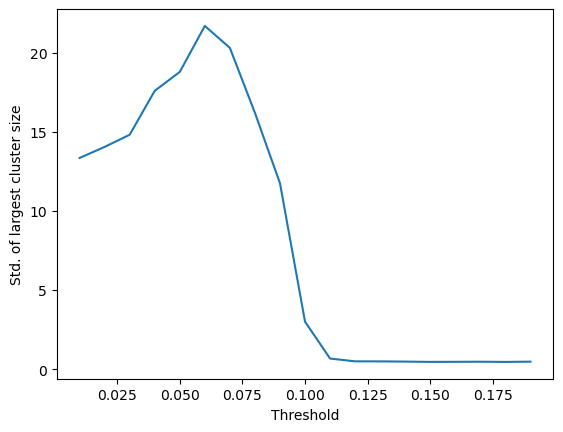

In [27]:
plt.plot(Ts, clusters.std(axis=1)[:,0])
plt.xlabel("Threshold")
plt.ylabel("Std. of largest cluster size")

## Ex. 5.
**Mystery simulation:** load file with activities, thresholds, and computed clusters. Can you say whether the system is critical?

# Playing around



## Ex. 1.
Try to disconnect the hemispheres in the human connectome. Note that left hemisphere is represented by nodes from 0 to 498, right hemisphere by nodes 499 to 998.

`Spy` on the adjacency matrix to check the difference. Then, using the connectome with disconnected hemispheres run simulations and check the criticality using clusters and other methods (e.g. std. dev. of activity).

Text(0.5, 1.0, 'Disconnected hemispheres')

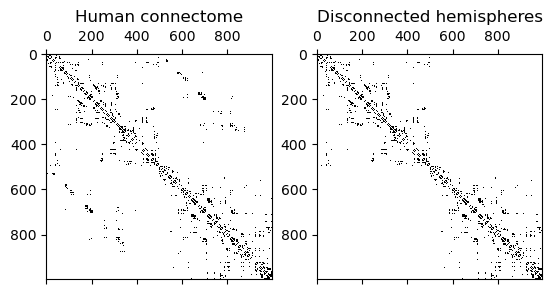

In [28]:
disconnected = np.copy(human_connectome)
disconnected[498:,:498] = 0.0
disconnected[:498, 498:] = 0.0

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.spy(human_connectome)
ax1.set_title("Human connectome")

ax2.spy(disconnected)
ax2.set_title("Disconnected hemispheres")

In [29]:
dynamics_disconnected = run_haimovici_simulation(2000, disconnected, Ts)

100%|██████████| 19/19 [00:08<00:00,  2.29it/s]


In [30]:
disconnected_clusters = batch_clusters(dynamics_disconnected, disconnected)
mean_disconnected_clusters = disconnected_clusters.mean(axis=1).T

100%|██████████| 19/19 [00:15<00:00,  1.27it/s]


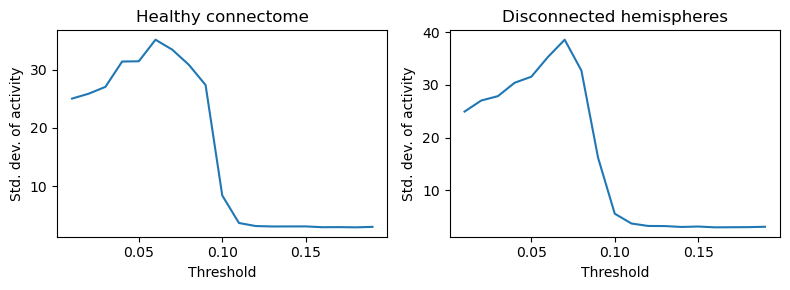

In [31]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,3))
ax1.plot(Ts, dynamics.sum(axis=1).std(axis=1))
ax1.set_xlabel("Threshold")
ax1.set_ylabel("Std. dev. of activity")
ax1.set_title("Healthy connectome")

ax2.plot(Ts, dynamics_disconnected.sum(axis=1).std(axis=1))
ax2.set_xlabel("Threshold")
ax2.set_ylabel("Std. dev. of activity")
ax2.set_title("Disconnected hemispheres")
fig.tight_layout()

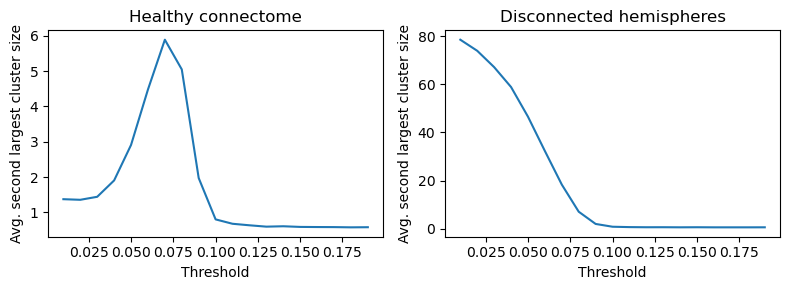

In [32]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,3))
ax1.plot(Ts, mean_clusters[1])
ax1.set_xlabel("Threshold")
ax1.set_ylabel("Avg. second largest cluster size")
ax1.set_title("Healthy connectome")

ax2.plot(Ts, mean_disconnected_clusters[1])
ax2.set_xlabel("Threshold")
ax2.set_ylabel("Avg. second largest cluster size")
ax2.set_title("Disconnected hemispheres")

fig.tight_layout()

## Ex. 2.
Artificial Stroke: remove connections between Sensory-Motor RSN (labelled by 4) and the rest of the brain. Check the criticality of the system using activity measure, e.g. standard deviation of the total activity, and compare with result computed using second largest cluster size.


Try also other labels:

VisM (Medial Visual) - 1
VisL (Lateral Visual) - 2
Aud (Auditory) - 3
SM (Sensory-Motor) - 4
DMN (Default Mode Network) - 5
EC (Executive Control) - 6
DorL (Dorsal Visual Stream Left) - 7
DorR (Dorsal Visual Stream Right) - 8




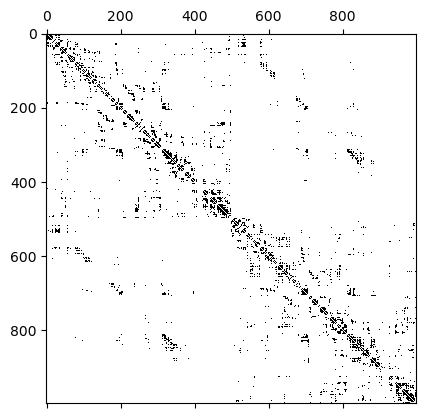

In [33]:
human_connectome_file = np.load("hagmann_connectome.npz")

human_connectome = human_connectome_file["connectome"]
roi = human_connectome_file['roi_lbs']

n_roi = len(roi)
rsn = 4.0

stroke_connectome = np.copy(human_connectome)

stroke_roi = np.where(roi == rsn)[0]
# print(stroke_roi)
for i in stroke_roi:
    for j in range(n_roi):
        if j not in stroke_roi:
            stroke_connectome[i, j] = 0.0
            stroke_connectome[j, i] = 0.0

plt.spy(stroke_connectome)

In [34]:
dynamics_stroked = run_haimovici_simulation(2000, stroke_connectome, Ts)
clusters_stroke = batch_clusters(dynamics_stroked, stroke_connectome)
mean_clusters_stroke = clusters_stroke.mean(axis=1).T

100%|██████████| 19/19 [00:12<00:00,  1.48it/s]


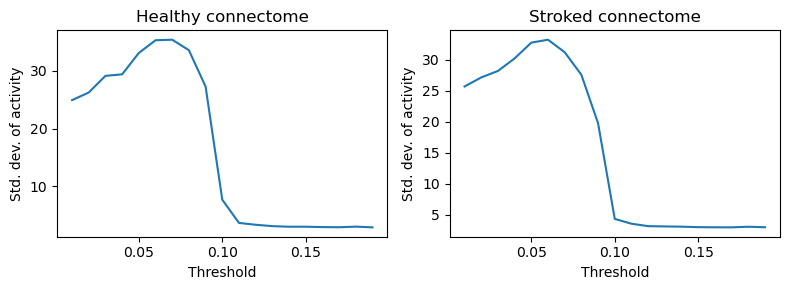

In [35]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,3))
ax1.plot(Ts, dynamics.sum(axis=1).std(axis=1))
ax1.set_xlabel("Threshold")
ax1.set_ylabel("Std. dev. of activity")
ax1.set_title("Healthy connectome")

ax2.plot(Ts, dynamics_stroked.sum(axis=1).std(axis=1))
ax2.set_xlabel("Threshold")
ax2.set_ylabel("Std. dev. of activity")
ax2.set_title("Stroked connectome")
fig.tight_layout()

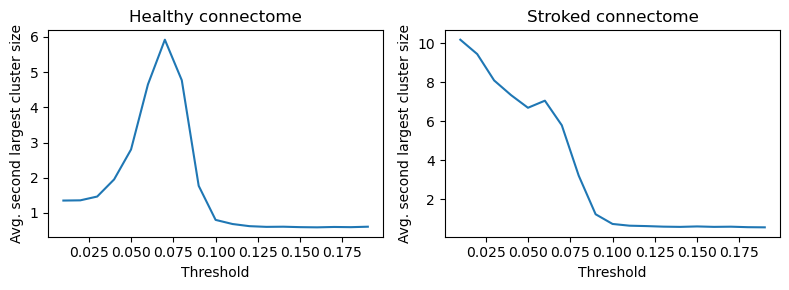

In [36]:
fig.tight_layout()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))
ax1.plot(Ts, mean_clusters[1])
ax1.set_xlabel("Threshold")
ax1.set_ylabel("Avg. second largest cluster size")
ax1.set_title("Healthy connectome")

ax2.plot(Ts, mean_clusters_stroke[1])
ax2.set_xlabel("Threshold")
ax2.set_ylabel("Avg. second largest cluster size")
ax2.set_title("Stroked connectome")

fig.tight_layout()

### Disconnecting two RSN at the same time:

100%|██████████| 19/19 [00:11<00:00,  1.65it/s]


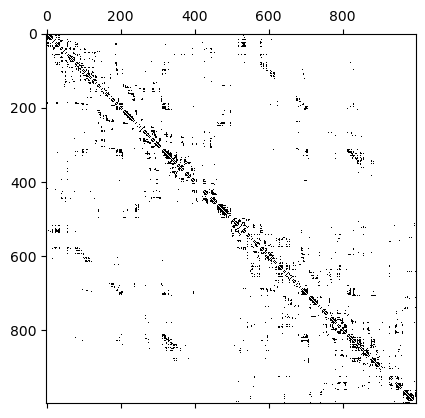

In [37]:
human_connectome_file = np.load("hagmann_connectome.npz")

human_connectome = human_connectome_file["connectome"]
roi = human_connectome_file['roi_lbs']

n_roi = len(roi)
rsn1 = 4.0
rsn2 = 3.0

stroke2_connectome = np.copy(human_connectome)

stroke_roi = np.concatenate((np.where(roi == rsn1)[0], np.where(roi == rsn2)[0]))
for i in stroke_roi:
    for j in range(n_roi):
        if j not in stroke_roi:
            stroke2_connectome[i, j] = 0.0
            stroke2_connectome[j, i] = 0.0

plt.spy(stroke2_connectome)
dynamics_stroke2 = run_haimovici_simulation(2000, stroke2_connectome, Ts)
clusters_stroke2 = batch_clusters(dynamics_stroked, stroke2_connectome)
mean_clusters_stroke2 = clusters_stroke2.mean(axis=1).T

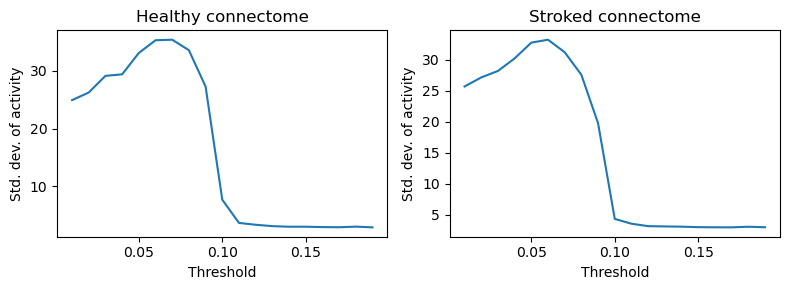

In [38]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,3))
ax1.plot(Ts, dynamics.sum(axis=1).std(axis=1))
ax1.set_xlabel("Threshold")
ax1.set_ylabel("Std. dev. of activity")
ax1.set_title("Healthy connectome")

ax2.plot(Ts, dynamics_stroked.sum(axis=1).std(axis=1))
ax2.set_xlabel("Threshold")
ax2.set_ylabel("Std. dev. of activity")
ax2.set_title("Stroked connectome")
fig.tight_layout()

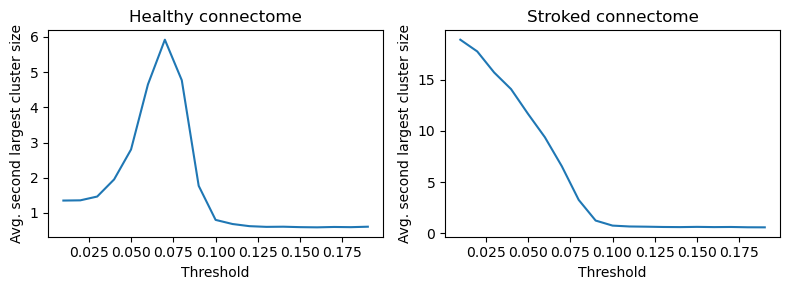

In [39]:
fig.tight_layout()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))
ax1.plot(Ts, mean_clusters[1])
ax1.set_xlabel("Threshold")
ax1.set_ylabel("Avg. second largest cluster size")
ax1.set_title("Healthy connectome")

ax2.plot(Ts, mean_clusters_stroke2[1])
ax2.set_xlabel("Threshold")
ax2.set_ylabel("Avg. second largest cluster size")
ax2.set_title("Stroked connectome")

fig.tight_layout()

## Ex. 3.
Epilepsy: try strengthening some connections or change them in a different way. Try to find the criticality using different measures and compare them with the health connectome.

(array([9.60274e+05, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 1.36200e+03, 1.89200e+04,
        4.85200e+03, 2.67200e+03, 1.80800e+03, 1.28600e+03, 1.02000e+03,
        7.84000e+02, 6.04000e+02, 4.94000e+02, 3.94000e+02, 2.92000e+02,
        2.68000e+02, 1.92000e+02, 1.60000e+02, 1.32000e+02, 1.00000e+02,
        9.80000e+01, 8.00000e+01, 5.80000e+01, 4.60000e+01, 1.60000e+01,
        2.60000e+01, 1.60000e+01, 1.40000e+01, 1.00000e+01, 6.00000e+00,
        6.00000e+00, 4.00000e+00, 2.00000e+00, 0.00000e+00, 2.00000e+00,
        0.00000e+00, 2.00000e+00, 0.00000e+00, 2.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 2.00000e+00]),
 array([0.        , 0.00557918, 0.01115835, 0.01673753, 0.0223167 ,
        0.02789588, 0.03347505, 0.03905423, 0.0446334 , 0.05021258,
        0.05579175, 0.06137093, 0.0669501 , 0.07252928, 0.07810845,
        0.08368763, 0.0892668 , 0.09484598, 0.10042515, 0.106004

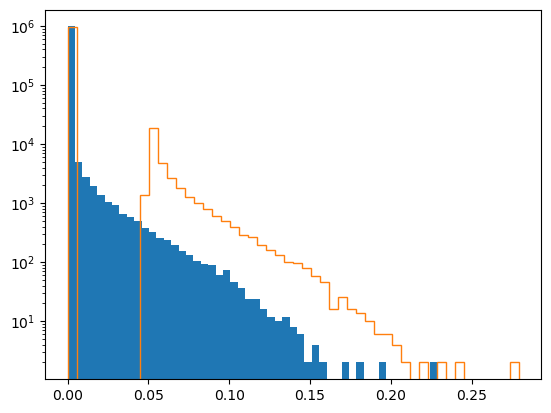

In [40]:
epilepsy_connectome = np.copy(human_connectome)
epilepsy_connectome[epilepsy_connectome > 0] = epilepsy_connectome[epilepsy_connectome > 0] + 0.05
np.fill_diagonal(epilepsy_connectome, 0)
plt.hist(human_connectome.flatten(), bins=50, log=True)
plt.hist(epilepsy_connectome.flatten(), bins=50, log=True, histtype='step')

In [41]:
Ts_epi = np.arange(0.01, 0.4, 0.02)
dynamics_epilepsy = run_haimovici_simulation(2000, epilepsy_connectome, Ts_epi)
clusters_epilepsy = batch_clusters(dynamics_epilepsy, epilepsy_connectome)
mean_clusters_epilepsy = clusters_epilepsy.mean(axis=1).T

100%|██████████| 20/20 [00:31<00:00,  1.56s/it]


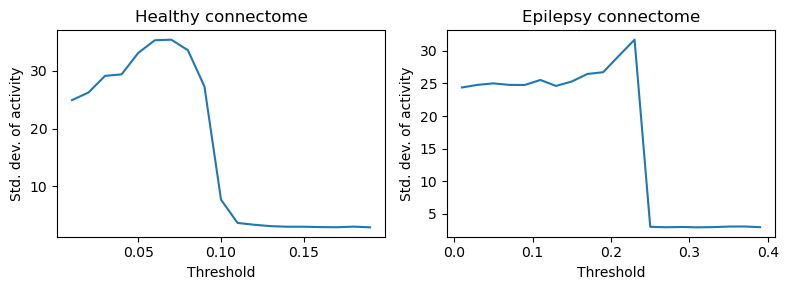

In [42]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))
ax1.plot(Ts, dynamics.sum(axis=1).std(axis=1))
ax1.set_xlabel("Threshold")
ax1.set_ylabel("Std. dev. of activity")
ax1.set_title("Healthy connectome")

ax2.plot(Ts_epi, dynamics_epilepsy.sum(axis=1).std(axis=1))
ax2.set_xlabel("Threshold")
ax2.set_ylabel("Std. dev. of activity")
ax2.set_title("Epilepsy connectome")
fig.tight_layout()

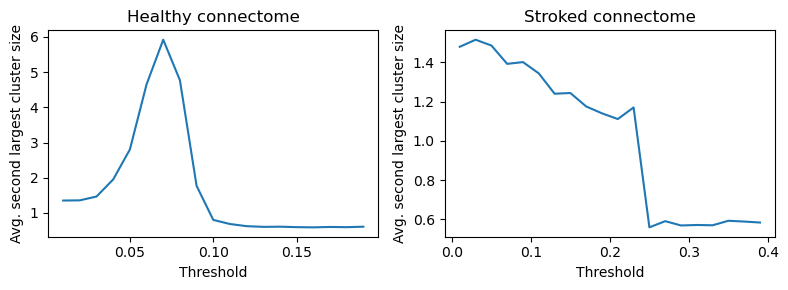

In [43]:
fig.tight_layout()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))
ax1.plot(Ts, mean_clusters[1])
ax1.set_xlabel("Threshold")
ax1.set_ylabel("Avg. second largest cluster size")
ax1.set_title("Healthy connectome")

ax2.plot(Ts_epi, mean_clusters_epilepsy[1])
ax2.set_xlabel("Threshold")
ax2.set_ylabel("Avg. second largest cluster size")
ax2.set_title("Stroked connectome")

fig.tight_layout()